In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import Xception, VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [5]:
base_model = VGG16(weights='imagenet', 
                   include_top=False, # 기존 출력층(10개분류) 안쓰고 내가 정하는 분류층을 정의할 예정
                   input_shape=(IMG_WIDTH,IMG_HEIGHT,3))

base_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [6]:
# 처리층 정의
model = Sequential()

model.add(base_model) # 기존층 추가

model.add(Flatten())

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(2, activation='softmax')) #최종출력은  2개, [0일 확률 1일 확률] 형태로 반환

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 16)                401424    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 15,116,146
Trainable params: 15,116,146
Non-trainable params: 0
_________________________________________________________________


In [7]:
print('base_model를 동결 전 학습 가중치 변수 층 수:', 
      len(model.trainable_weights)) 

base_model를 동결 전 학습 가중치 변수 층 수: 30


In [8]:
base_model.trainable = False # 기존 파라미터 학습 수정 안함. VGG16의 분류모델은 그대로 사용할 것이기 때문에 해당 층수(26층)들의 가중치는 건드리지 않겠다는 뜻

In [9]:
print('conv_base를 동결 후 학습 가중치 변수 층 수:', 
      len(model.trainable_weights)) # 학습할 층 갯수 출력 base_model 이후로 직접 추가한 부분만 가중치 업데이트(4개층)

conv_base를 동결 후 학습 가중치 변수 층 수: 4


In [10]:
# ImageDataGenerator 이용하여 데이터 불러옴

train_data_gen = ImageDataGenerator(rescale=1./255, 
                                    rotation_range=10, 
                                    width_shift_range=0.1, 
                                    height_shift_range=0.1, 
                                    shear_range=0.1, 
                                    zoom_range=0.1)            # 이미지를 이렇게 변형하겠다고 정의만 함

test_data_gen = ImageDataGenerator(rescale=1./255)

In [11]:
train_dir = '/content/drive/MyDrive/kb_datasets/사과_토마토/train'

test_dir = '/content/drive/MyDrive/kb_datasets/사과_토마토/test'

In [12]:
train_data = train_data_gen.flow_from_directory(train_dir, batch_size=32,               # 실제로 데이터를 변형하여 가져옴. (라벨링도 자동으로 해준다.)
                                                color_mode='rgb', 
                                                shuffle=True, 
                                                class_mode='categorical',
                                                target_size=(IMG_WIDTH,IMG_HEIGHT))


test_data = test_data_gen.flow_from_directory(test_dir, batch_size=32, 
                                              color_mode='rgb', 
                                              shuffle=True, 
                                              class_mode='categorical',
                                              target_size=(IMG_WIDTH,IMG_HEIGHT))

Found 102 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [13]:
# 정답 확인

print(train_data.class_indices.items())
print(test_data.class_indices.items())

print(len(train_data.classes))
print(len(test_data.classes))

print(train_data.num_classes)
print(test_data.num_classes)

dict_items([('구글사과', 0), ('구글토마토', 1)])
dict_items([('구글사과', 0), ('구글토마토', 1)])
102
15
2
2


In [14]:
# 모델 컴파일

# model.compile(loss='categorical_crossentropy', 
model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(2e-5), metrics=['accuracy'])

In [15]:
train_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [16]:
train_data.num_classes

2

In [17]:
train_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [18]:
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

save_file_name = './apple_tomato_filtered_VGG16_Colab.h5' # 최종적으로 얻고자 하는 W(가중치)값이 저장된 파일

checkpoint = ModelCheckpoint(save_file_name,       
                             monitor='val_loss',   
                             verbose=1,            
                             save_best_only=True,  # val_loss가 가장 낮을때마다 저장 False면 매번 저장하기 때문에 지정해주는 의미가 없음.
                             mode='auto'           
                            )

earlystopping = EarlyStopping(monitor='val_loss',  
                              patience=5,          # 5 epochs 동안 val_loss가 같을 때 종료
                             )

start_time = datetime.now()

hist = model.fit(train_data, 
                #  epochs=30, 
                 epochs=50, 
                 validation_data=test_data,
                 callbacks=[checkpoint, earlystopping])

end_time = datetime.now()

print('elapsed time = ', end_time-start_time)

Epoch 1/50
4/4 [==============================] - ETA: 0s - loss: 0.8771 - accuracy: 0.5196
Epoch 1: val_loss improved from inf to 0.78101, saving model to ./apple_tomato_filtered_VGG16_Colab.h5
4/4 [==============================] - 72s 12s/step - loss: 0.8771 - accuracy: 0.5196 - val_loss: 0.7810 - val_accuracy: 0.4667
Epoch 2/50
4/4 [==============================] - ETA: 0s - loss: 0.8342 - accuracy: 0.5098
Epoch 2: val_loss improved from 0.78101 to 0.70187, saving model to ./apple_tomato_filtered_VGG16_Colab.h5
4/4 [==============================] - 2s 420ms/step - loss: 0.8342 - accuracy: 0.5098 - val_loss: 0.7019 - val_accuracy: 0.6000
Epoch 3/50
4/4 [==============================] - ETA: 0s - loss: 0.7561 - accuracy: 0.4510
Epoch 3: val_loss improved from 0.70187 to 0.67474, saving model to ./apple_tomato_filtered_VGG16_Colab.h5
4/4 [==============================] - 2s 542ms/step - loss: 0.7561 - accuracy: 0.4510 - val_loss: 0.6747 - val_accuracy: 0.6000
Epoch 4/50
4/4 [=====

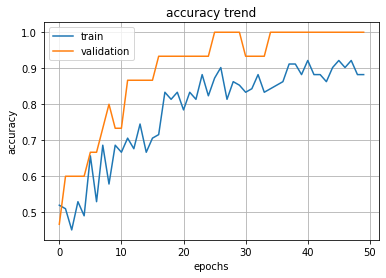

In [19]:
import matplotlib.pyplot as plt

plt.title('accuracy trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.legend(loc='best')
plt.show()

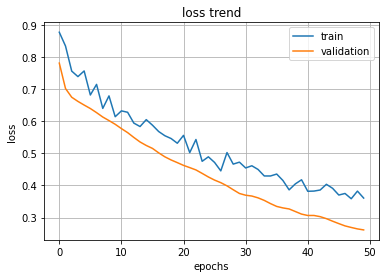

In [20]:
import matplotlib.pyplot as plt

plt.title('loss trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.legend(loc='best')
plt.show()

In [22]:
import cv2
import glob

test_img_list = []
# 파일경로 목록 생성
test_img_name_list = glob.glob('/content/drive/MyDrive/kb_datasets/사과_토마토_val/*')

for i in range(len(test_img_name_list)):
    
    src_img = cv2.imread(test_img_name_list[i], cv2.IMREAD_COLOR)
    
    src_img = cv2.resize(src_img, dsize=(IMG_WIDTH, IMG_HEIGHT))

    dst_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

    dst_img = dst_img / 255.0

    test_img_list.append(dst_img)

print(test_img_name_list)
print(len(test_img_list))

['/content/drive/MyDrive/kb_datasets/사과_토마토_val/download (1).jpeg', '/content/drive/MyDrive/kb_datasets/사과_토마토_val/download (2) (1).jpeg', '/content/drive/MyDrive/kb_datasets/사과_토마토_val/images (1).jpeg', '/content/drive/MyDrive/kb_datasets/사과_토마토_val/download (4) (1).jpeg', '/content/drive/MyDrive/kb_datasets/사과_토마토_val/download (3) (1).jpeg', '/content/drive/MyDrive/kb_datasets/사과_토마토_val/images (40).jpeg', '/content/drive/MyDrive/kb_datasets/사과_토마토_val/images (38) (1).jpeg', '/content/drive/MyDrive/kb_datasets/사과_토마토_val/images (41).jpeg', '/content/drive/MyDrive/kb_datasets/사과_토마토_val/download (2).jpeg', '/content/drive/MyDrive/kb_datasets/사과_토마토_val/images.jpeg', '/content/drive/MyDrive/kb_datasets/사과_토마토_val/download (3).jpeg', '/content/drive/MyDrive/kb_datasets/사과_토마토_val/download (5).jpeg', '/content/drive/MyDrive/kb_datasets/사과_토마토_val/download (4).jpeg', '/content/drive/MyDrive/kb_datasets/사과_토마토_val/images

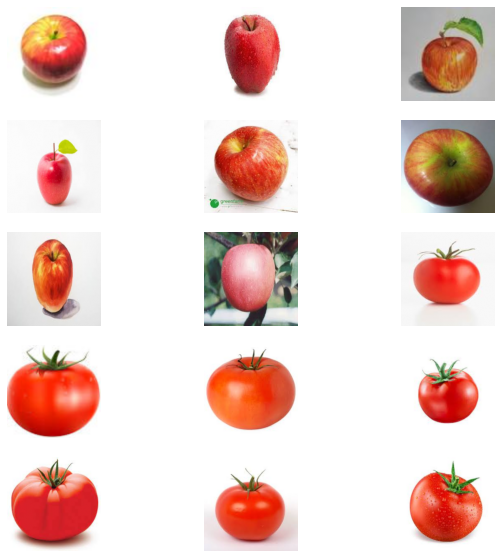

In [30]:
plt.figure(figsize=(10,10))

for i in range(len(test_img_list)):

    plt.subplot(5, 3, i+1)
    plt.axis('off')
    plt.imshow(test_img_list[i])

plt.show()

In [24]:
for i in range(len(test_img_list)):

    print(test_img_list[i].shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [25]:
# predict 수행하기 위해 batch 차원 추가
import numpy as np

print(np.array(test_img_list).shape)

(15, 224, 224, 3)


In [26]:
# predict 실행

class_name = [ 'apple', 'tomato' ]  # ImageDataGenerator 에서 cat=0, dog=1 순서는 flow_from_directory 아래 정답 확인에서 확인해봐야 함.

pred = model.predict(np.array(test_img_list))

print(pred.shape)
print(pred)

(15, 2)
[[0.89436644 0.10563351]
 [0.9746231  0.02537688]
 [0.8882737  0.11172628]
 [0.7537271  0.2462729 ]
 [0.98060054 0.01939949]
 [0.6250974  0.37490264]
 [0.7993802  0.20061983]
 [0.9471271  0.05287287]
 [0.09654706 0.9034529 ]
 [0.03080239 0.96919763]
 [0.0521949  0.9478051 ]
 [0.02709191 0.9729081 ]
 [0.02668855 0.9733114 ]
 [0.09596602 0.90403396]
 [0.16747265 0.83252734]]


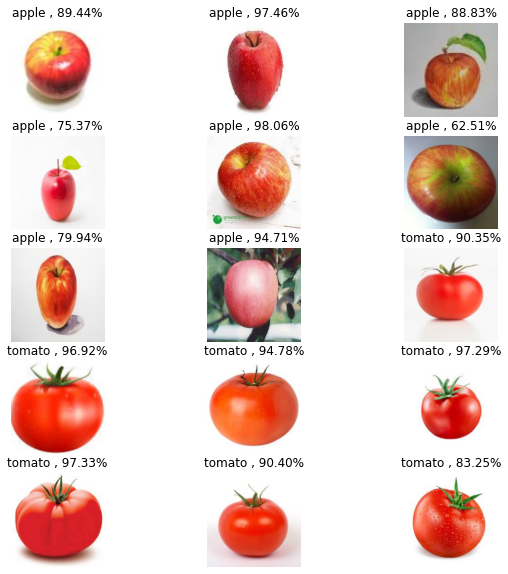

In [31]:
class_name = [ 'apple', 'tomato' ]  # ImageDataGenerator 에서 cat=0, dog=1

plt.figure(figsize=(10,10))

for i in range(len(pred)):

    plt.subplot(5,3, i+1)
    prediction = str(class_name[np.argmax(pred[i])]) # max값의 순번 가져와서 class_name을 통해 cat인지 dog인지 라벨링
    probility = '{0:0.2f}'.format(100*max(pred[i])) # pred의 max값 * 100 을 통해 확률 출력
    title_str = prediction + ' , ' + probility + '%'
    plt.axis('off')
    plt.title(title_str)
    plt.imshow(test_img_list[i])

plt.show()